# ANÁLISIS EXPLORATORIO DE DATOS - MÓDULO 3
# AUTOR: MIGUEL HUAYANEY MILLA
## DATASET: [Kaggle: Machine Predictive Maintenance](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification)

# INSTALACIÓN DE KAGGLEHUB

In [1]:
!pip install kagglehub

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")
file = '/predictive_maintenance.csv'

path_file = path + file

print("Path to dataset files:", path_file)

100%|██████████| 137k/137k [00:00<00:00, 34.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/machine-predictive-maintenance-classification/versions/1/predictive_maintenance.csv


# IMPORTACIÓN DE LIBRERIAS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# APARIENCIA DE GRÁFICAS

In [6]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [52]:
pmaintenance_df = pd.read_csv(path_file)
pmaintenance_df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# 1. VALIDACIÓN DE DATOS Y ANÁLISIS DE NULOS

# 1.1. TIPOS DE DATOS Y CANTIDADES

In [53]:
pmaintenance_df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [54]:
pmaintenance_df.dtypes.value_counts()

,count
int64,4
object,3
float64,3


In [55]:
pmaintenance_df.shape

(10000, 10)

## 1.2. ANÁLISIS DE VALORES NULOS

In [56]:
pmaintenance_df.isnull().any()

,0
UDI,False
Product ID,False
Type,False
Air temperature [K],False
Process temperature [K],False
Rotational speed [rpm],False
Torque [Nm],False
Tool wear [min],False
Target,False
Failure Type,False


**Nota:** Como se puede apreciar la data no presenta valores nulos, pero a modo de practicar se colocará los códigos correspondientes para el tratamiento de valores nulos.

In [57]:
pmaintenance_df.isnull().sum().sort_values(ascending=False)

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [58]:
plot_null_pmaintenance = pmaintenance_df.isnull().melt(value_name='missing')
plot_null_pmaintenance

,variable,missing
0,UDI,False
1,UDI,False
2,UDI,False
3,UDI,False
4,UDI,False
...,...,...
99995,Failure Type,False
99996,Failure Type,False
99997,Failure Type,False
99998,Failure Type,False


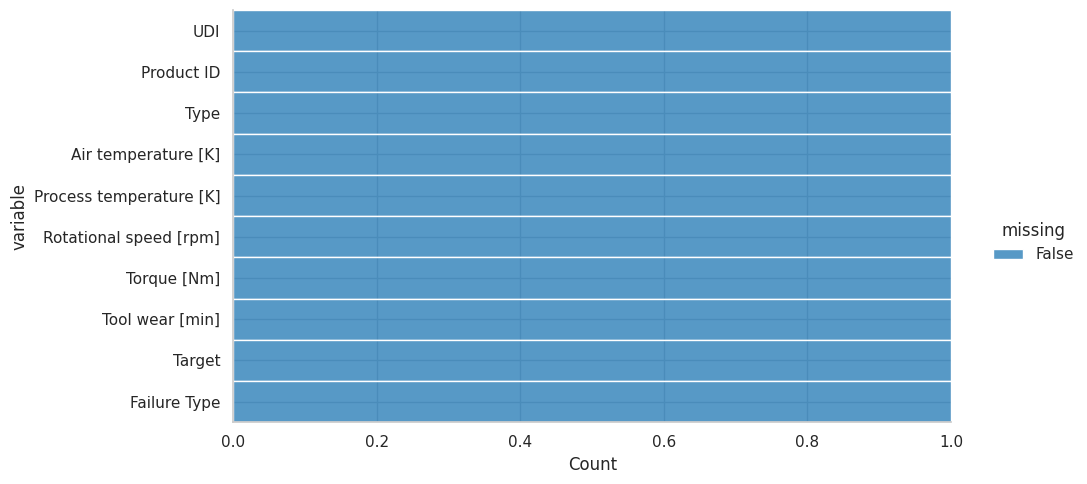

In [59]:
sns.displot(data=plot_null_pmaintenance, y='variable', hue='missing', aspect=2, multiple='fill')

**Nota:** Se confirma que no existen valores nulos en la data que se está analizando.

<Axes: >

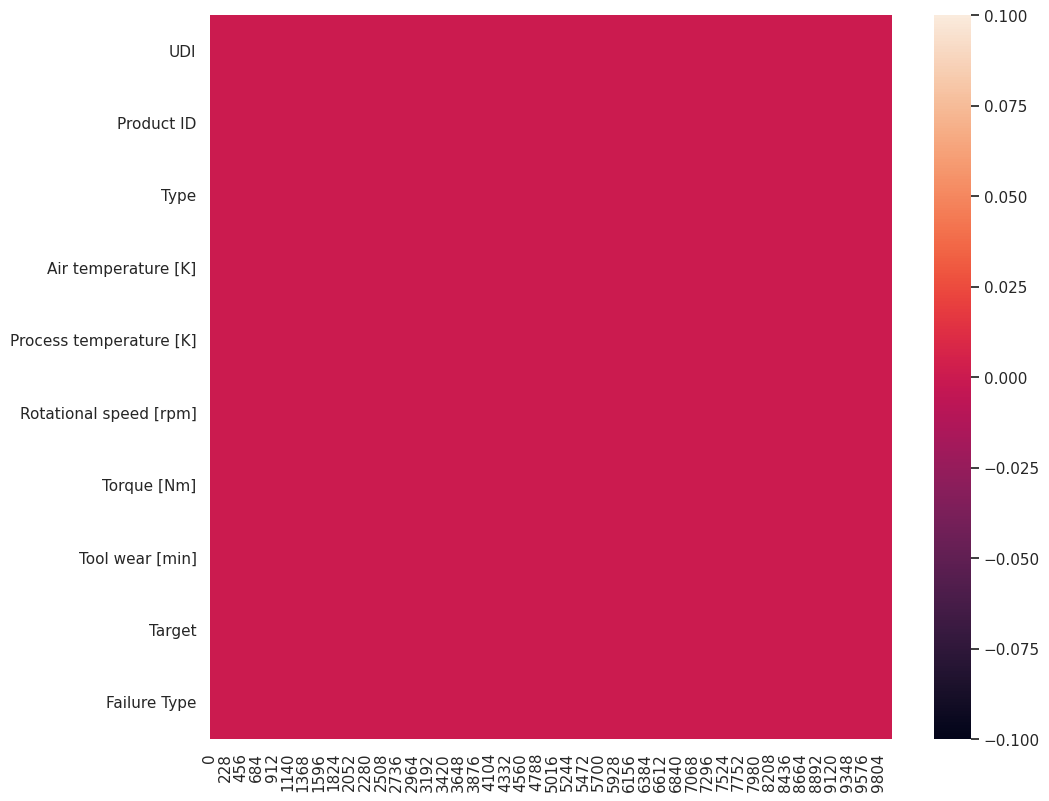

In [60]:
(
    pmaintenance_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿CUÁNTOS VALORES PERDERÉ SI ELIMINO LOS NULOS?

In [61]:
pmaintenance_df.shape[0]

10000

In [62]:
pmaintenance_df.dropna().shape[0]

10000

In [63]:
int(pmaintenance_df.shape[0]) - int(pmaintenance_df.dropna().shape[0])

0

**Nota:** En este caso no se perderá datos debido a que la data no presenta valores nulos.

### ELIMINAMOS VALORES NULOS

In [64]:
pmaintenance_df.dropna(inplace=True)
pmaintenance_df.isnull().sum().sum()

0

# 2. FILTRADO DE DATOS PARA UN MEJOR ANÁLISIS

In [65]:
pmaintenance_df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [66]:
pmaintenance_df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [67]:
pmaintenance_processed_df = pmaintenance_df.drop(columns=['UDI','Product ID','Failure Type']).copy()
pmaintenance_processed_df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


# 3. CORRELACIONES

## 3.1. CORRELACIÓN DE VARIABLES NUMÉRICAS

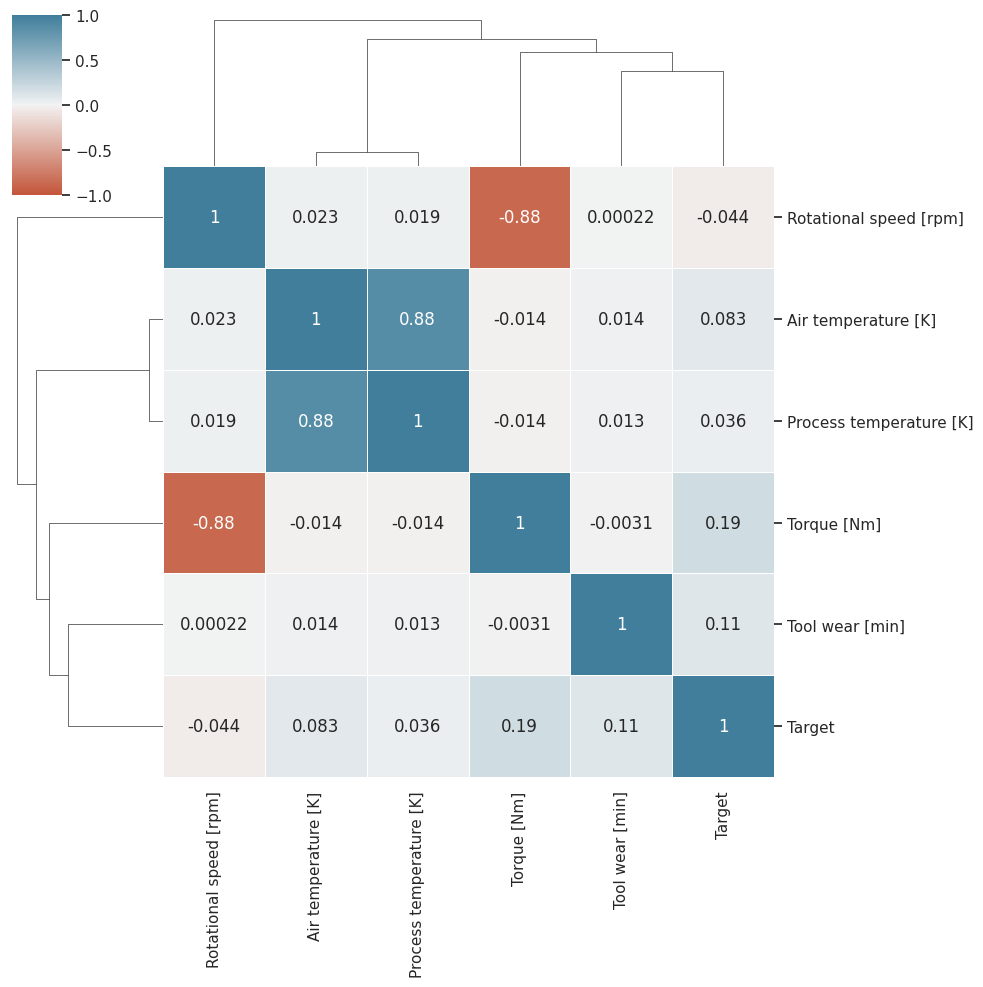

In [68]:
sns.clustermap(
    data=pmaintenance_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True,

)

## 3.2. CORRELACIÓN DE VARIABLES CATEGORICAS

In [70]:
print(pmaintenance_processed_df['Type'].unique())

['M' 'L' 'H']


In [76]:
pmaintenance_processed_df = (
    pmaintenance_processed_df
    .assign(
        numeric_type=lambda df: df.Type.replace(pmaintenance_processed_df['Type'].unique(),[1,2,3])
    )
    .drop(columns=['numeric_maintenance_type'])
)
pmaintenance_processed_df

<ipython-input-76-ed40eb0d93a6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_type=lambda df: df.Type.replace(pmaintenance_processed_df['Type'].unique(),[1,2,3])


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,numeric_type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,2
2,L,298.1,308.5,1498,49.4,5,0,2
3,L,298.2,308.6,1433,39.5,7,0,2
4,L,298.2,308.7,1408,40.0,9,0,2
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,1
9996,H,298.9,308.4,1632,31.8,17,0,3
9997,M,299.0,308.6,1645,33.4,22,0,1
9998,H,299.0,308.7,1408,48.5,25,0,3


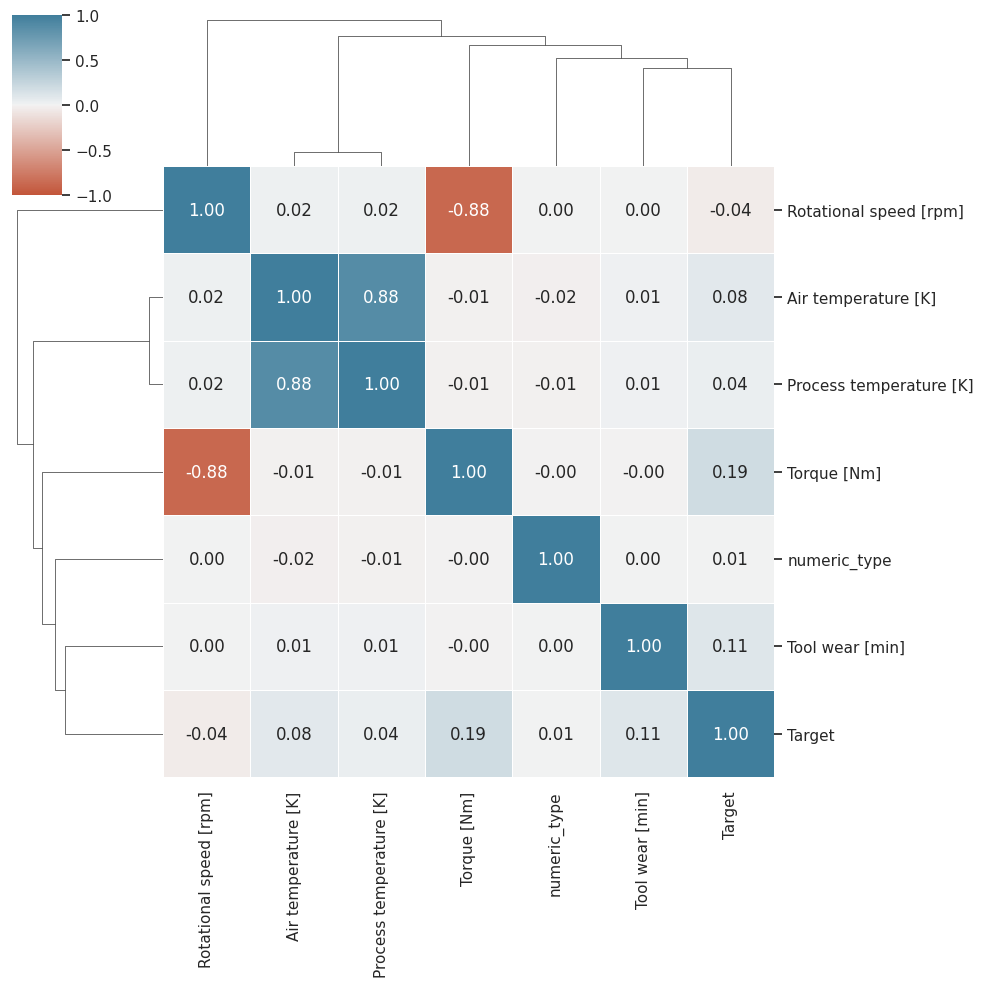

In [77]:
sns.clustermap(
    data=pmaintenance_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True,
    fmt=".2f"
)

# 4. MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

## 4.1. TENDENCIA CENTRAL

In [78]:
pmaintenance_processed_df.mean(numeric_only=True)

,0
Air temperature [K],300.00493
Process temperature [K],310.00556
Rotational speed [rpm],1538.77610
Torque [Nm],39.98691
Tool wear [min],107.95100
Target,0.03390
numeric_type,1.80060


In [79]:
pmaintenance_processed_df.median(numeric_only=True)

,0
Air temperature [K],300.1
Process temperature [K],310.1
Rotational speed [rpm],1503.0
Torque [Nm],40.1
Tool wear [min],108.0
Target,0.0
numeric_type,2.0


In [80]:
pmaintenance_processed_df.mode(numeric_only=True)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,numeric_type
0,300.7,310.6,1452,40.2,0,0,2


## 4.2. DISPERSIÓN

In [81]:
pmaintenance_processed_df.min(numeric_only=True)

,0
Air temperature [K],295.3
Process temperature [K],305.7
Rotational speed [rpm],1168.0
Torque [Nm],3.8
Tool wear [min],0.0
Target,0.0
numeric_type,1.0


In [82]:
pmaintenance_processed_df.max(numeric_only=True)

,0
Air temperature [K],304.5
Process temperature [K],313.8
Rotational speed [rpm],2886.0
Torque [Nm],76.6
Tool wear [min],253.0
Target,1.0
numeric_type,3.0


In [83]:
pmaintenance_processed_df.std(numeric_only=True)

,0
Air temperature [K],2.000259
Process temperature [K],1.483734
Rotational speed [rpm],179.284096
Torque [Nm],9.968934
Tool wear [min],63.654147
Target,0.180981
numeric_type,0.600230


In [84]:
(
    pmaintenance_processed_df
    .quantile(q=[0.25,0.50,0.75], numeric_only=True)
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(iqr = lambda df: df[0.75] - df[0.25])
)

,metric,0.25,0.5,0.75,iqr
0,Air temperature [K],298.3,300.1,301.5,3.2
1,Process temperature [K],308.8,310.1,311.1,2.3
2,Rotational speed [rpm],1423.0,1503.0,1612.0,189.0
3,Torque [Nm],33.2,40.1,46.8,13.6
4,Tool wear [min],53.0,108.0,162.0,109.0
5,Target,0.0,0.0,0.0,0.0
6,numeric_type,1.0,2.0,2.0,1.0


## 4.3. GRÁFICA DE MEDIDAS CENTRALES Y DISPERSIÓN DE UNA VARIABLE

La **variable** seleccionada es: **Air temperature [K]**

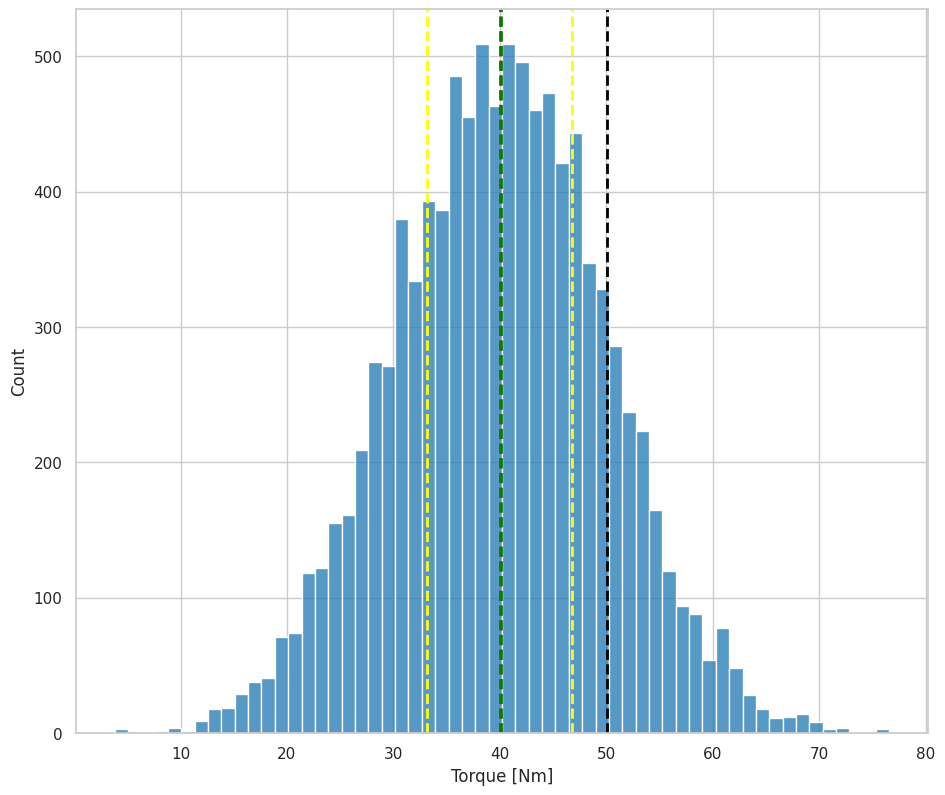

In [86]:
df = pmaintenance_processed_df
variable = 'Torque [Nm]'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# 5. CONTEO Y PROPORCIONES

In [87]:
pmaintenance_processed_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,numeric_type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,1.80060
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.60023
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,1.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,2.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,2.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,3.00000


In [88]:
pmaintenance_processed_df.describe(include='object')

,Type
count,10000
unique,3
top,L
freq,6000


## 5.1. CONTEO:

La **variable** seleccionada es: **Type**

In [89]:
type_color = {
    'L': 'red',
    'M': 'green',
    'H': 'blue'
}

<Axes: xlabel='Type'>

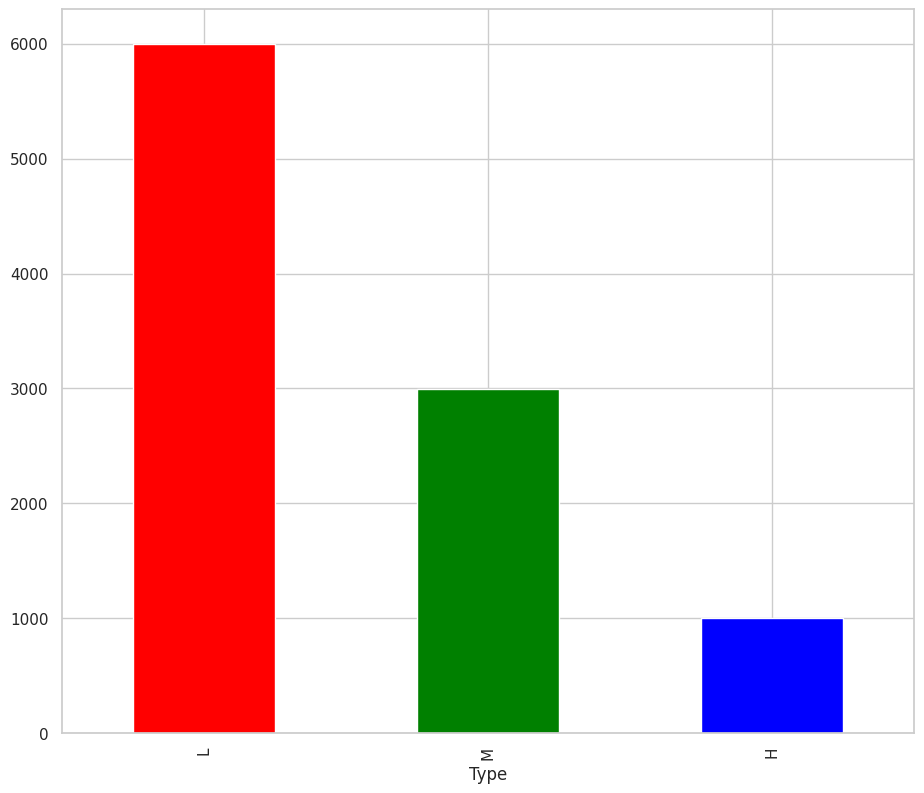

In [90]:
(
    pmaintenance_processed_df
    .Type
    .value_counts()
    .plot(
        kind='bar',
        color=type_color.values()
    )
)

## 5.2. PROPORCIONES

La **variable** seleccionada es: **Type**

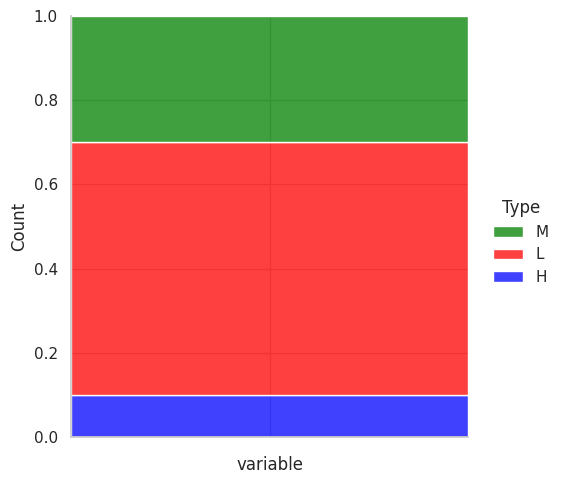

In [91]:
pmaintenance_processed_df['variable'] = ''
(
    pmaintenance_processed_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='Type',
                multiple='fill',
                palette=type_color
            )
        )
    )
)

# 6. ANÁLISIS BIVARIADO

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

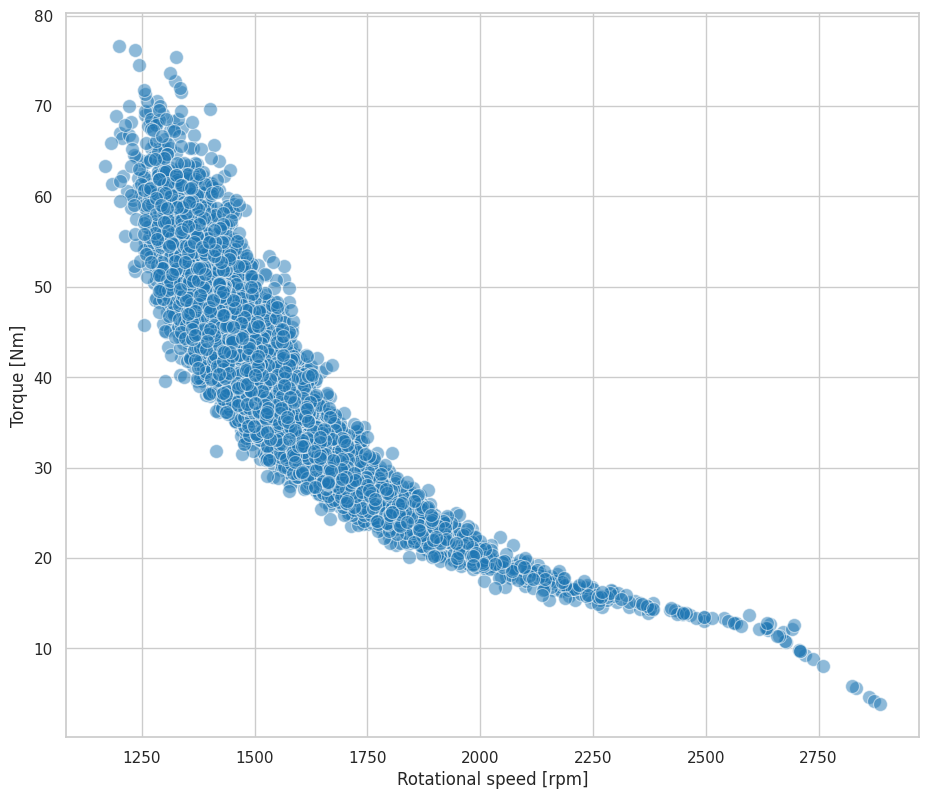

In [92]:
sns.scatterplot(
    data=pmaintenance_processed_df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    alpha=0.5,
    s=100
)

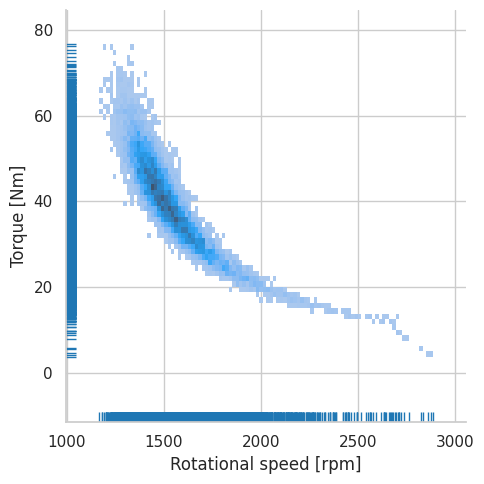

In [93]:
sns.displot(
    data=pmaintenance_processed_df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    rug=True
)

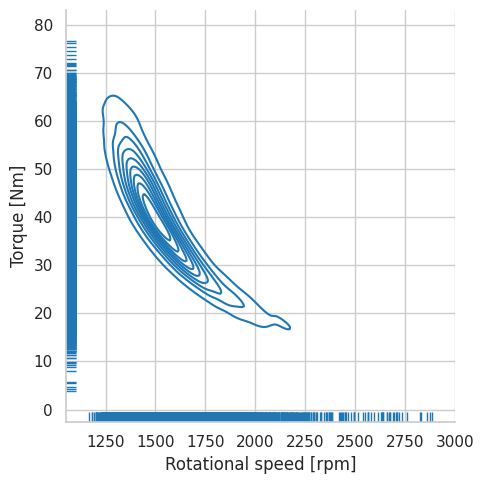

In [94]:
sns.displot(
    data=pmaintenance_processed_df,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    kind='kde',
    rug=True
)

## 6.1. RELACIÓN ENTRE CATEGÓRICOS Y NUMÉRICOS

<Axes: xlabel='Type', ylabel='Torque [Nm]'>

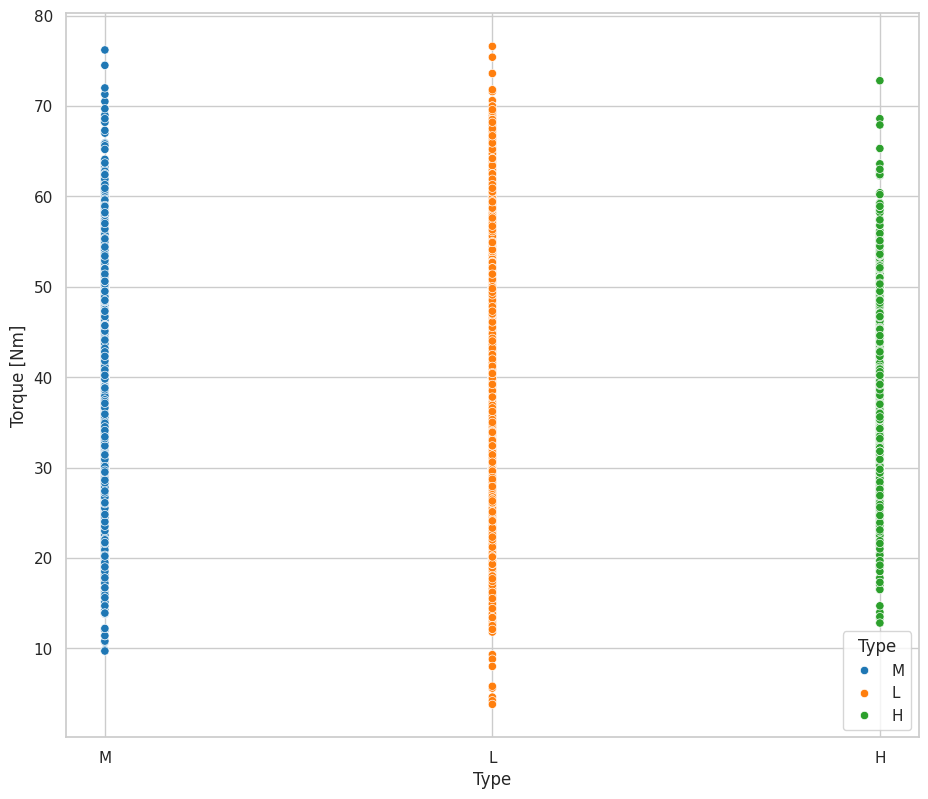

In [96]:
sns.scatterplot(
    data=pmaintenance_processed_df,
    x='Type',
    y='Torque [Nm]',
    hue='Type'
)

<Axes: xlabel='Type', ylabel='Torque [Nm]'>

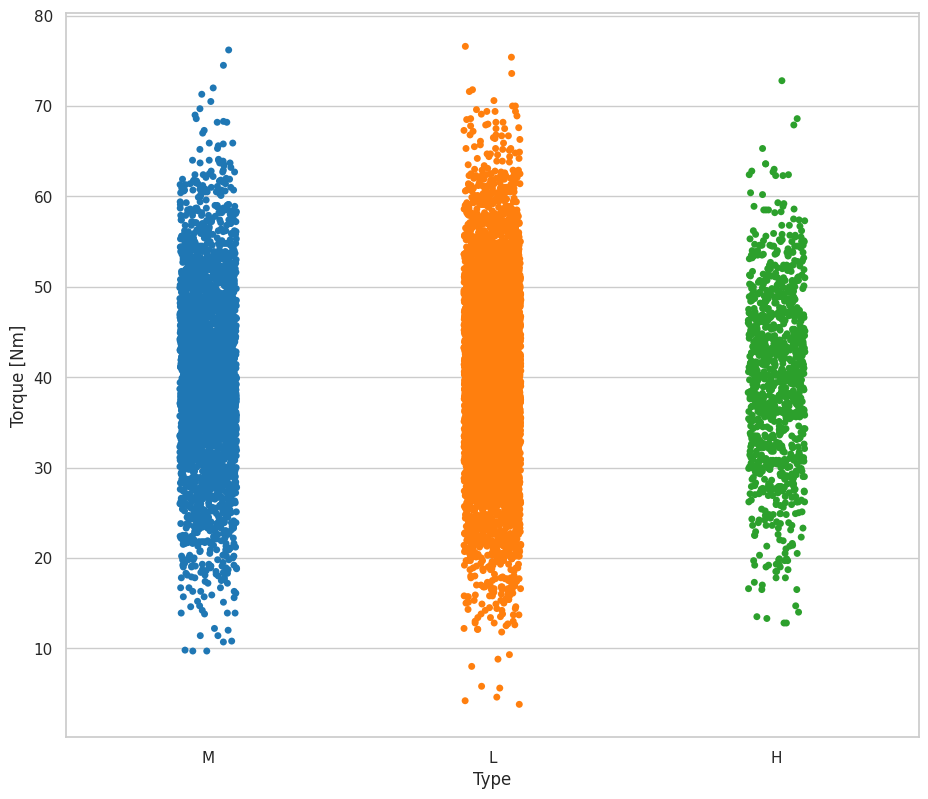

In [97]:
sns.stripplot(
    data=pmaintenance_processed_df,
    x='Type',
    y='Torque [Nm]',
    hue='Type'
)

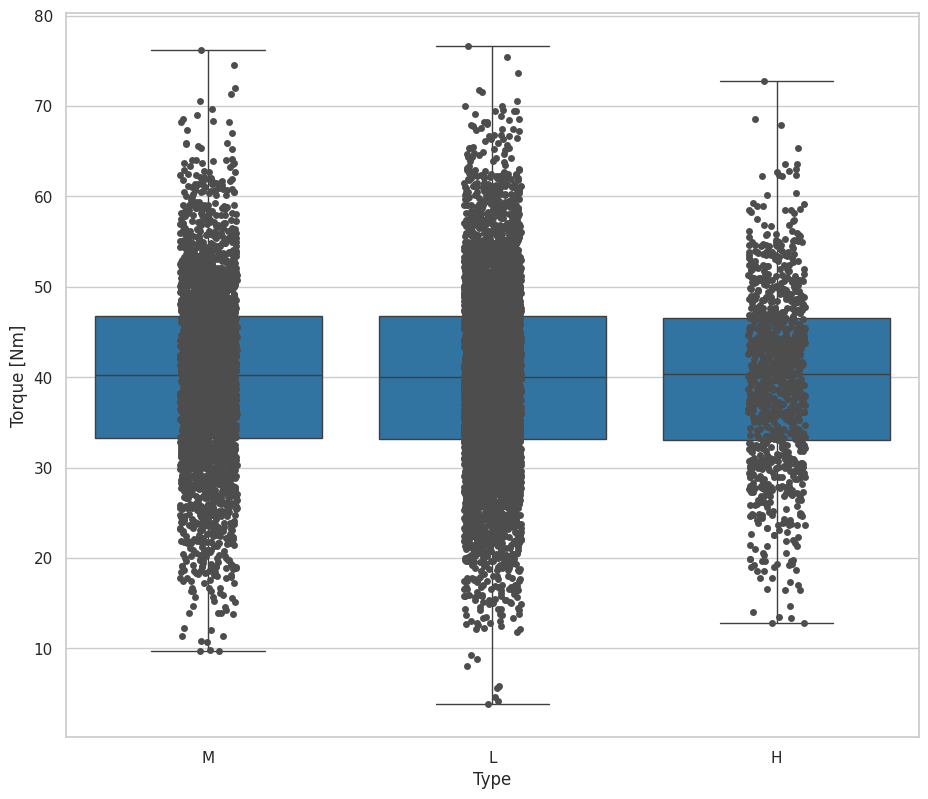

In [98]:
ax = sns.boxplot(
    data=pmaintenance_processed_df,
    x='Type',
    y='Torque [Nm]',
    whis=np.inf
)
ax = sns.stripplot(
    data=pmaintenance_processed_df,
    x='Type',
    y='Torque [Nm]',
    color='.3'
)